Image processing assignments

All the image processing assignments require to use the following dataset:

www.kaggle.com/datasets/ztaihong/weizmann-horse-database/data

The dataset contains in the horse directory 327 pictures of horses and in the mask directory where each image correspond to one image in the horse directory, and reports the corresponding manual segmentation of the horse.


Assignment 5
Perform image segmentation on all images in the dataset, using the normalized cut algorithm running on the top of superpixels rather than on raw pixels. For each image compute an accuracy metric (which one it is up to you to decide) measuring the overlap between the segments identified by NCUT and the ground truth horse semantic segmentation. Provide a table summarizing the average segmentation accuracy on all images, plus present 2 examples of images that are well-segmented (according to the above defined metric).

Hint: in Python, you have an NCut implementation in the scikit-image library; in Matlab, you can use the original NCut implementation here. Superpixels are implemented both in Matlab as well as in OpenCV. Feel free to pickup the implementation you liked most (and motivate the choice).

In [1]:
print("helo")

helo


In [3]:
# import scikit learn image
from skimage import io
import matplotlib.pyplot as plt

In [4]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt

In [7]:
from utils1 import load_images_from_folder
folder_path = '..\\datasets\\weizmann_horse_db\\horse'
images = load_images_from_folder(folder_path)

TypeError: rag_mean_color() missing 1 required positional argument: 'labels'

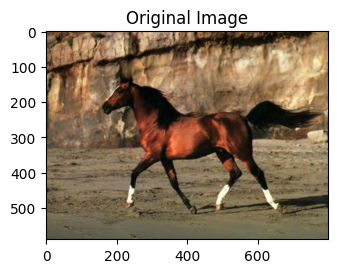

In [13]:
image = images[0]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Perform normalized cut segmentation
labels1 = segmentation.slic(image, compactness=30, n_segments=400,
                            start_label=1)

rag = graph.rag_mean_color(image)
labels = graph.cut_normalized(image, rag)

# Visualize the segmented image
plt.subplot(1, 2, 2)
plt.imshow(color.label2rgb(labels, image=image))
plt.title('Segmented Image')
plt.show()

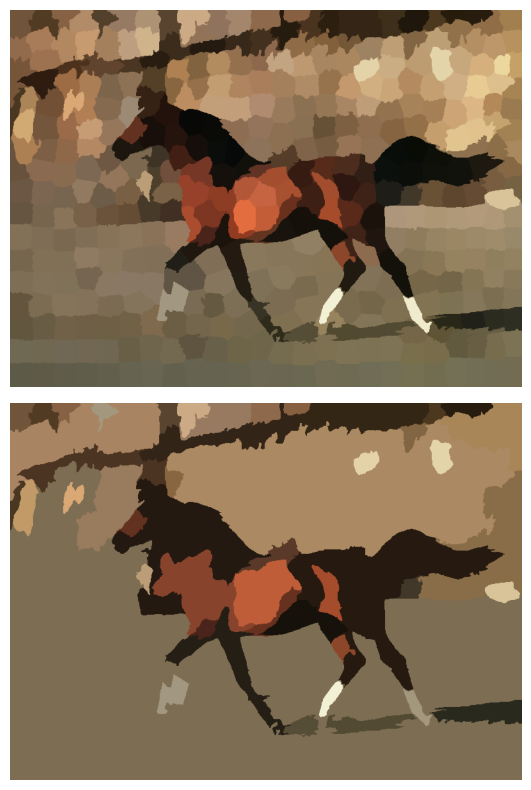

In [14]:
img = image

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()